# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [2]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [3]:
# your code here
html = requests.get(url).content
soup = BeautifulSoup(html, "html.parser")
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <link href="https://github.githubassets.com" rel="dns-prefetch"/>\n  <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>\n  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>\n  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>\n  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-next-33eaceaeba85d4949f45eb897becf7b5.css" integrity="sha512-M+rOrrqF1JSfReuJe+z3tZLbJ2S9Blt6dzIAQp0s5n6ps4eFL01D/bei2Qf9Qo0RLw7Dh8zVze9A1ozNHu2k2Q==" media="all" rel="stylesheet">\n   <link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-next-7dbb92872a8f95d6138b81f09e806b04.css" inte

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [4]:
# your code here
frame = soup.find_all(['h1','p'],{'class':['h3 lh-condensed','f4 text-normal mb-1']})
frame

[<h1 class="h3 lh-condensed">
 <a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":284934,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="8827947f7be3430d6e90b2203c6178dc7cb0d1ca44e3bc13bf074762df3f4982" href="/borkdude">
             Michiel Borkent
 </a>
 </h1>,
 <p class="f4 text-normal mb-1">
 <a class="link-gray" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":284934,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="8827947f7be3430d6e90b2203c6178dc7cb0d1ca44e3bc13bf074762df3f4982" href="/borkdude">
               borkdude
 </a>
 </p>,
 <h1 class="h3 lh-condensed">
 <a data-hy

In [5]:
lines = []
for line in frame:
    lines.append(line.text)
lines

['\n\n            Michiel Borkent\n\n',
 '\n\n              borkdude\n\n',
 '\n\n            Prabir Shrestha\n\n',
 '\n\n              prabirshrestha\n\n',
 '\n\n            Michael Mok\n\n',
 '\n\n              pmmmwh\n\n',
 '\n\n            Arvid Norberg\n\n',
 '\n\n              arvidn\n\n',
 '\n\n            Will McGugan\n\n',
 '\n\n              willmcgugan\n\n',
 '\n\n            Mihai\n\n',
 '\n\n              amihaiemil\n\n',
 '\n\n            Nat Alison\n\n',
 '\n\n              tesseralis\n\n',
 '\n\n            Henrik Rydgård\n\n',
 '\n\n              hrydgard\n\n',
 '\n\n            Saad Pasta\n\n',
 '\n\n              saadpasta\n\n',
 '\n\n            Yuvi Panda\n\n',
 '\n\n              yuvipanda\n\n',
 '\n\n            Manfred Touron\n\n',
 '\n\n              moul\n\n',
 '\n\n            Geoff Boeing\n\n',
 '\n\n              gboeing\n\n',
 '\n\n            Paul Biggar\n\n',
 '\n\n              pbiggar\n\n',
 '\n\n            Juliette\n\n',
 '\n\n              jrfnl\n\n'

In [6]:
lines_split = 2
lines_refactored = [lines[x:x+lines_split] for x in range(0, len(lines), lines_split)]
lines_refactored

[['\n\n            Michiel Borkent\n\n', '\n\n              borkdude\n\n'],
 ['\n\n            Prabir Shrestha\n\n',
  '\n\n              prabirshrestha\n\n'],
 ['\n\n            Michael Mok\n\n', '\n\n              pmmmwh\n\n'],
 ['\n\n            Arvid Norberg\n\n', '\n\n              arvidn\n\n'],
 ['\n\n            Will McGugan\n\n', '\n\n              willmcgugan\n\n'],
 ['\n\n            Mihai\n\n', '\n\n              amihaiemil\n\n'],
 ['\n\n            Nat Alison\n\n', '\n\n              tesseralis\n\n'],
 ['\n\n            Henrik Rydgård\n\n', '\n\n              hrydgard\n\n'],
 ['\n\n            Saad Pasta\n\n', '\n\n              saadpasta\n\n'],
 ['\n\n            Yuvi Panda\n\n', '\n\n              yuvipanda\n\n'],
 ['\n\n            Manfred Touron\n\n', '\n\n              moul\n\n'],
 ['\n\n            Geoff Boeing\n\n', '\n\n              gboeing\n\n'],
 ['\n\n            Paul Biggar\n\n', '\n\n              pbiggar\n\n'],
 ['\n\n            Juliette\n\n', '\n\n         

In [7]:
names = []
for x in lines_refactored:
    for y in x:
        clean = y.replace('\n','').replace(' ','')
        names.append(clean)
names

['MichielBorkent',
 'borkdude',
 'PrabirShrestha',
 'prabirshrestha',
 'MichaelMok',
 'pmmmwh',
 'ArvidNorberg',
 'arvidn',
 'WillMcGugan',
 'willmcgugan',
 'Mihai',
 'amihaiemil',
 'NatAlison',
 'tesseralis',
 'HenrikRydgård',
 'hrydgard',
 'SaadPasta',
 'saadpasta',
 'YuviPanda',
 'yuvipanda',
 'ManfredTouron',
 'moul',
 'GeoffBoeing',
 'gboeing',
 'PaulBiggar',
 'pbiggar',
 'Juliette',
 'jrfnl',
 'YoshuaWuyts',
 'yoshuawuyts',
 'RikkiSchulte',
 'acao',
 'RichHarris',
 'Rich-Harris',
 'Dessalines',
 'dessalines',
 'JavierSuárez',
 'jsuarezruiz',
 'OrtaTherox',
 'orta',
 'Mr.doob',
 'mrdoob',
 'ItamarRavid',
 'iravid',
 'KoenKanters',
 'Koenkk',
 'DanielWirtz',
 'dcodeIO',
 'PaulChaignon',
 'pchaigno']

In [8]:
result = []
for name in range(0,len(names),2):
    all = names[name]+' '+'('+names[name+1]+')'
    result.append(all)
result

['MichielBorkent (borkdude)',
 'PrabirShrestha (prabirshrestha)',
 'MichaelMok (pmmmwh)',
 'ArvidNorberg (arvidn)',
 'WillMcGugan (willmcgugan)',
 'Mihai (amihaiemil)',
 'NatAlison (tesseralis)',
 'HenrikRydgård (hrydgard)',
 'SaadPasta (saadpasta)',
 'YuviPanda (yuvipanda)',
 'ManfredTouron (moul)',
 'GeoffBoeing (gboeing)',
 'PaulBiggar (pbiggar)',
 'Juliette (jrfnl)',
 'YoshuaWuyts (yoshuawuyts)',
 'RikkiSchulte (acao)',
 'RichHarris (Rich-Harris)',
 'Dessalines (dessalines)',
 'JavierSuárez (jsuarezruiz)',
 'OrtaTherox (orta)',
 'Mr.doob (mrdoob)',
 'ItamarRavid (iravid)',
 'KoenKanters (Koenkk)',
 'DanielWirtz (dcodeIO)',
 'PaulChaignon (pchaigno)']

#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [9]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [10]:
# your code here
html = requests.get(url).content
soup = BeautifulSoup(html, "html.parser")
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-next-33eaceaeba85d4949f45eb897becf7b5.css" integrity="sha512-M+rOrrqF1JSfReuJe+z3tZLbJ2S9Blt6dzIAQp0s5n6ps4eFL01D/bei2Qf9Qo0RLw7Dh8zVze9A1ozNHu2k2Q==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-next-7dbb92872a8f95d6138b81f09e806b04.css" integri

In [11]:
frame = soup.find_all(['h1'],{'class':'h3 lh-condensed'})
frame

[<h1 class="h3 lh-condensed">
 <a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":253601257,"originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="40df9f1707f215f6a8eda98bb41eb6190a7f64a8ab4d1da6b2d67126690affea" href="/alievk/avatarify">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 text-gray" color="gray" height="16" mr="1" version="1.1" viewbox="0 0 16 16" width="16"><path d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z" fill-rule="evenodd"></pa

In [12]:
lines = []
for line in frame:
    lines.append(line.text)
lines

['\n\n\n\n        alievk /\n\n\n\n      avatarify\n\n',
 '\n\n\n\n        m4ll0k /\n\n\n\n      Bug-Bounty-Toolz\n\n',
 '\n\n\n\n        donnemartin /\n\n\n\n      data-science-ipython-notebooks\n\n',
 '\n\n\n\n        iduta /\n\n\n\n      pyconv\n\n',
 '\n\n\n\n        RasaHQ /\n\n\n\n      rasa\n\n',
 '\n\n\n\n        Deep-MI /\n\n\n\n      FastSurfer\n\n',
 '\n\n\n\n        willmcgugan /\n\n\n\n      rich\n\n',
 '\n\n\n\n        ildoonet /\n\n\n\n      tf-pose-estimation\n\n',
 '\n\n\n\n        d2l-ai /\n\n\n\n      d2l-en\n\n',
 '\n\n\n\n        Gallopsled /\n\n\n\n      pwntools\n\n',
 '\n\n\n\n        quantopian /\n\n\n\n      zipline\n\n',
 '\n\n\n\n        AlexxIT /\n\n\n\n      YandexStation\n\n',
 '\n\n\n\n        devanshbatham /\n\n\n\n      Awesome-Bugbounty-Writeups\n\n',
 '\n\n\n\n        deezer /\n\n\n\n      spleeter\n\n',
 '\n\n\n\n        vsitzmann /\n\n\n\n      siren\n\n',
 '\n\n\n\n        shenweichen /\n\n\n\n      DeepCTR\n\n',
 '\n\n\n\n        microsoft /\n\n\n

In [13]:
lines_split = 1
lines_refactored = [lines[x:x+lines_split] for x in range(0, len(lines), lines_split)]
lines_refactored

[['\n\n\n\n        alievk /\n\n\n\n      avatarify\n\n'],
 ['\n\n\n\n        m4ll0k /\n\n\n\n      Bug-Bounty-Toolz\n\n'],
 ['\n\n\n\n        donnemartin /\n\n\n\n      data-science-ipython-notebooks\n\n'],
 ['\n\n\n\n        iduta /\n\n\n\n      pyconv\n\n'],
 ['\n\n\n\n        RasaHQ /\n\n\n\n      rasa\n\n'],
 ['\n\n\n\n        Deep-MI /\n\n\n\n      FastSurfer\n\n'],
 ['\n\n\n\n        willmcgugan /\n\n\n\n      rich\n\n'],
 ['\n\n\n\n        ildoonet /\n\n\n\n      tf-pose-estimation\n\n'],
 ['\n\n\n\n        d2l-ai /\n\n\n\n      d2l-en\n\n'],
 ['\n\n\n\n        Gallopsled /\n\n\n\n      pwntools\n\n'],
 ['\n\n\n\n        quantopian /\n\n\n\n      zipline\n\n'],
 ['\n\n\n\n        AlexxIT /\n\n\n\n      YandexStation\n\n'],
 ['\n\n\n\n        devanshbatham /\n\n\n\n      Awesome-Bugbounty-Writeups\n\n'],
 ['\n\n\n\n        deezer /\n\n\n\n      spleeter\n\n'],
 ['\n\n\n\n        vsitzmann /\n\n\n\n      siren\n\n'],
 ['\n\n\n\n        shenweichen /\n\n\n\n      DeepCTR\n\n'],
 ['

In [14]:
repositories = []
for x in lines_refactored:
    for y in x:
        clean = y.replace('\n','').replace(' ','')
        repositories.append(clean)
repositories

['alievk/avatarify',
 'm4ll0k/Bug-Bounty-Toolz',
 'donnemartin/data-science-ipython-notebooks',
 'iduta/pyconv',
 'RasaHQ/rasa',
 'Deep-MI/FastSurfer',
 'willmcgugan/rich',
 'ildoonet/tf-pose-estimation',
 'd2l-ai/d2l-en',
 'Gallopsled/pwntools',
 'quantopian/zipline',
 'AlexxIT/YandexStation',
 'devanshbatham/Awesome-Bugbounty-Writeups',
 'deezer/spleeter',
 'vsitzmann/siren',
 'shenweichen/DeepCTR',
 'microsoft/forecasting',
 'PrefectHQ/prefect',
 'VPanjeta/ModiScript',
 'libratbag/piper',
 'Ultimaker/Cura',
 'frappe/erpnext',
 'deeppomf/DeepCreamPy',
 'wrenfairbank/telegram_gcloner',
 'wistbean/learn_python3_spider']

In [15]:
result = []
for repository in repositories:
    element = repository.split('/')
    solution = element[1].lstrip()
    result.append(solution)
result

['avatarify',
 'Bug-Bounty-Toolz',
 'data-science-ipython-notebooks',
 'pyconv',
 'rasa',
 'FastSurfer',
 'rich',
 'tf-pose-estimation',
 'd2l-en',
 'pwntools',
 'zipline',
 'YandexStation',
 'Awesome-Bugbounty-Writeups',
 'spleeter',
 'siren',
 'DeepCTR',
 'forecasting',
 'prefect',
 'ModiScript',
 'piper',
 'Cura',
 'erpnext',
 'DeepCreamPy',
 'telegram_gcloner',
 'learn_python3_spider']

#### Display all the image links from Walt Disney wikipedia page.

In [16]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [17]:
# your code here
html = requests.get(url).content
soup = BeautifulSoup(html, "html.parser")
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Walt Disney - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"73f9af0f-25d2-471a-a065-4b74cb9e0e98","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Walt_Disney","wgTitle":"Walt Disney","wgCurRevisionId":964733994,"wgRevisionId":964733994,"wgArticleId":32917,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages containing links to subscription-only content","Wikipedia extended-confirmed-protected pages","Wikipedia indefinitely move-protected pages","Art

In [18]:
frame = soup.find_all('a',{'class':'image'})
frame

[<a class="image" href="/wiki/File:Walt_Disney_1946.JPG"><img alt="Walt Disney 1946.JPG" data-file-height="675" data-file-width="450" decoding="async" height="330" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/330px-Walt_Disney_1946.JPG 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/440px-Walt_Disney_1946.JPG 2x" width="220"/></a>,
 <a class="image" href="/wiki/File:Walt_Disney_1942_signature.svg"><img alt="Walt Disney 1942 signature.svg" data-file-height="218" data-file-width="585" decoding="async" height="56" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/225px-Walt_Disney_1942_signature.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/t

In [19]:
links = []
for element in frame:
    url = 'https://en.wikipedia.org/'
    url += element['href']
    links.append(url)
links

['https://en.wikipedia.org//wiki/File:Walt_Disney_1946.JPG',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_1942_signature.svg',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_envelope_ca._1921.jpg',
 'https://en.wikipedia.org//wiki/File:Trolley_Troubles_poster.jpg',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_and_his_cartoon_creation_%22Mickey_Mouse%22_-_National_Board_of_Review_Magazine.jpg',
 'https://en.wikipedia.org//wiki/File:Steamboat-willie.jpg',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_1935.jpg',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_Snow_white_1937_trailer_screenshot_(13).jpg',
 'https://en.wikipedia.org//wiki/File:Disney_drawing_goofy.jpg',
 'https://en.wikipedia.org//wiki/File:DisneySchiphol1951.jpg',
 'https://en.wikipedia.org//wiki/File:WaltDisneyplansDisneylandDec1954.jpg',
 'https://en.wikipedia.org//wiki/File:Walt_disney_portrait_right.jpg',
 'https://en.wikipedia.org//wiki/File:Walt_Disney_Grave.JPG',
 'https://en.wikipedia.org//wiki/F

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [20]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [21]:
from urllib.request import urlopen #Looking for the way of achieve a list of link in google, I found this method

In [22]:
# your code here
html = urlopen(url)
soup = BeautifulSoup(html)
links = []
for link in soup.findAll('a'):
    if 'href' in link.attrs:
        links.append(link.attrs['href'])
links # I'm not sure if it is the solution requested but, I've created a list of the whole links showed in the page

['#mw-head',
 '#p-search',
 'https://en.wiktionary.org/wiki/Python',
 'https://en.wiktionary.org/wiki/python',
 '#Snakes',
 '#Ancient_Greece',
 '#Media_and_entertainment',
 '#Computing',
 '#Engineering',
 '#Roller_coasters',
 '#Vehicles',
 '#Weaponry',
 '#People',
 '#Other_uses',
 '#See_also',
 '/w/index.php?title=Python&action=edit&section=1',
 '/wiki/Pythonidae',
 '/wiki/Python_(genus)',
 '/w/index.php?title=Python&action=edit&section=2',
 '/wiki/Python_(mythology)',
 '/wiki/Python_of_Aenus',
 '/wiki/Python_(painter)',
 '/wiki/Python_of_Byzantium',
 '/wiki/Python_of_Catana',
 '/w/index.php?title=Python&action=edit&section=3',
 '/wiki/Python_(film)',
 '/wiki/Pythons_2',
 '/wiki/Monty_Python',
 '/wiki/Python_(Monty)_Pictures',
 '/w/index.php?title=Python&action=edit&section=4',
 '/wiki/Python_(programming_language)',
 '/wiki/CPython',
 '/wiki/CMU_Common_Lisp',
 '/wiki/PERQ#PERQ_3',
 '/w/index.php?title=Python&action=edit&section=5',
 '/w/index.php?title=Python&action=edit&section=6',
 

#### Find the number of titles that have changed in the United States Code since its last release point.

In [23]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [24]:
# your code here
titles = requests.get(url).text
titles

'<?xml version=\'1.0\' encoding=\'UTF-8\' ?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml"><head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n        <meta http-equiv="X-UA-Compatible" content="IE=8" />\n        <meta http-equiv="pragma" content="no-cache" /><!-- HTTP 1.0 -->\n        <meta http-equiv="cache-control" content="no-cache,must-revalidate" /><!-- HTTP 1.1 -->\n        <meta http-equiv="expires" content="0" />\n        <link rel="shortcut icon" href="/javax.faces.resource/favicon.ico.xhtml?ln=images" /><link type="text/css" rel="stylesheet" href="/javax.faces.resource/cssLayout.css.xhtml?ln=css" /><script type="text/javascript" src="/javax.faces.resource/jsf.js.xhtml?ln=javax.faces"></script><link type="text/css" rel="stylesheet" href="/javax.faces.resource/static.css.xhtml?ln=css" /></head><body><script type="text/javas

In [25]:
titles_changed = titles.count('class="usctitlechanged" id')
titles_changed

7

#### Find a Python list with the top ten FBI's Most Wanted names.

In [26]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>Security Prompt</title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
<script type="text/javascript">
  //<![CDATA[
  (function(){
    
    var a = function() {try{return !!window.addEventListener} catch(e) {return !1} },
    b = function(b, c) {a() ? document.addEventListener("DOMContentLo
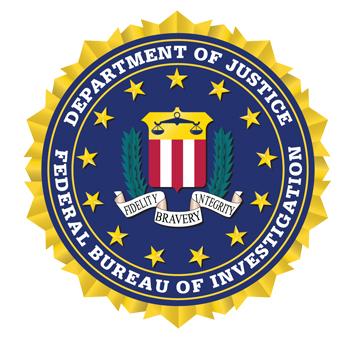

In [30]:
# your code here
response = requests.get(url).content
soup = BeautifulSoup(response, 'html.parser')
soup

In [31]:
frame = soup.find_all('h3',{'class':'title'})
frame

[]

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
# your code here

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [ ]:
# your code here

#### A list with the different kind of datasets available in data.gov.uk.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
# your code here

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
# your code here

## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here